In [30]:
from sklearn.feature_selection import VarianceThreshold
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['pdf.fonttype'] = 42
selector = VarianceThreshold(threshold=0.0005)
ACRG_features = pd.read_csv("../Data/ACRG_c7_c28.csv",index_col=0).T
STAD_features = pd.read_csv("../Data/Batch_RNA_seq_c7_c28.csv",index_col=0).T
STAD_features.index= [x.replace(".","-") for x in list(STAD_features.index)]

In [2]:
# the original PUL model only include the MSI-H&TILs-H&TMB-H group and MSS group
RNA_seq_samples = list(pd.read_csv("../Data/STAD_MSIH_TILsH_TMBH.txt",index_col=0).index)+ list(pd.read_csv("../Data/STAD_EBV_27.txt",index_col=0).index) + list(pd.read_csv("../Data/STAD_MSS_257.txt",index_col=0).index)
Microarray_samples = list(pd.read_csv("../Data/ARGC_MSIH_TILsH.txt",index_col=0).index) + list(pd.read_csv("../Data/GSE62254_EBV_18.txt",index_col=0).index)+ list(pd.read_csv("../Data/GSE62254_MSS_226.txt",index_col=0).index)

In [3]:
Microarray_features = ACRG_features.loc[Microarray_samples,:]
RNA_seq_features = STAD_features.loc[RNA_seq_samples,:]

In [4]:
selector.fit(Microarray_features) 
High_variance_Microarray = selector.get_feature_names_out()

selector.fit(RNA_seq_features)
High_variance_RNA_seq = selector.get_feature_names_out()

In [5]:
len([x for x in High_variance_Microarray if x in High_variance_RNA_seq])
High_variance_features = [x for x in High_variance_Microarray if x in High_variance_RNA_seq]

In [6]:
Microarray_features_High_variance = Microarray_features[High_variance_features]
RNA_seq_features_High_variance = RNA_seq_features[High_variance_features]

In [7]:
Microarray_features_High_variance.to_csv("../data/Microarray_features_High_variance.csv")
RNA_seq_features_High_variance.to_csv("../data/RNA_seq_features_High_variance.csv")

In [8]:
features_df = pd.DataFrame(columns = ["Features"])
features_df["Features"] = High_variance_features
features_df.to_csv("../data/High_variance_features_name.txt",sep="\t",index=False)

In [15]:
pca = PCA(n_components=10)
Microarray_PCA = pca.fit_transform(Microarray_features_High_variance)
PCA1 = pca.explained_variance_ratio_.cumsum()

In [16]:

pca = PCA(n_components=10)
RNA_seq_PCA = pca.fit_transform(RNA_seq_features_High_variance)
PCA2 = pca.explained_variance_ratio_.cumsum()

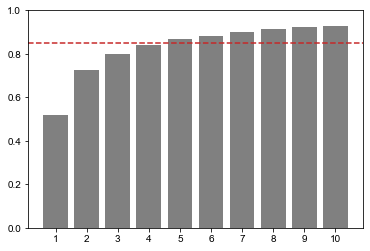

In [31]:
fig = plt.figure(figsize=(6,4))
ax = fig.gca()
# df = df.sort_values(by="ARGC",ascending=False)
plt.bar(x = range(1,11),height = PCA2,color = "grey")
plt.axhline(y = 0.85, color = '#C62828', linestyle = '--')
ax.set_xticks(range(1,11))
ax.set_yticks([0,0.2,0.4,0.6,0.8,1.0])
fig.savefig("STAD_PCA_explained.pdf",dpi=600,bbox_inches='tight',transparent=True)

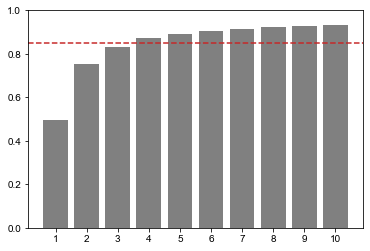

In [32]:
fig = plt.figure(figsize=(6,4))
ax = fig.gca()
# df = df.sort_values(by="ARGC",ascending=False)
plt.bar(x = range(1,11),height = PCA1,color = "grey")
plt.axhline(y = 0.85, color = '#C62828', linestyle = '--')
ax.set_xticks(range(1,11))
ax.set_yticks([0,0.2,0.4,0.6,0.8,1.0])
fig.savefig("ACRG_PCA_explained.pdf",dpi=600,bbox_inches='tight',transparent=True)

In [ ]:
Microarray_PCA_df = pd.DataFrame(Microarray_PCA,index=Microarray_samples)
RNA_seq_PCA_df = pd.DataFrame(RNA_seq_PCA,index=RNA_seq_samples)

In [10]:
Microarray_PCA_df.to_csv("../data/Microarray_PCA_df.csv")
RNA_seq_PCA_df.to_csv("../data/RNA_seq_PCA_df.csv")